# Network Clustering - Lab

## Introduction

In this lab you'll practice your clustering and visualization skills to investigate stackoverflow! Specifically, the dataset you'll be investigating examines tags on stackoverflow. With this, you should be able to explore some of the related technologies currently in use by developers.

## Objectives

In this lab you will: 

- Make visualizations of clusters and gain insights about how the clusters have formed

## Load the Dataset

Load the data from the `'stack-overflow-tag-network/stack_network_links.csv'` file. For now, simply load the file as a standard pandas DataFrame.

In [34]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('stack-overflow-tag-network/stack_network_links.csv')
df.head()

source target      value
0             azure   .net  20.933192
1        sql-server   .net  32.322524
2           asp.net   .net  48.407030
3  entity-framework   .net  24.370903
4               wpf   .net  32.350925

## Transform the Dataset into a Network Graph using NetworkX

Transform the dataset from a Pandas DataFrame into a NetworkX graph.

In [35]:
import networkx as nx

G = nx.Graph()
for row in df.index:
    source = df.source[row]
    target = df.target[row]
    weight = df.value[row]
    G.add_edge(source, target, weight=weight)
print(len(G.nodes))

115


## Create an Initial Graph Visualization

Next, create an initial visualization of the network.

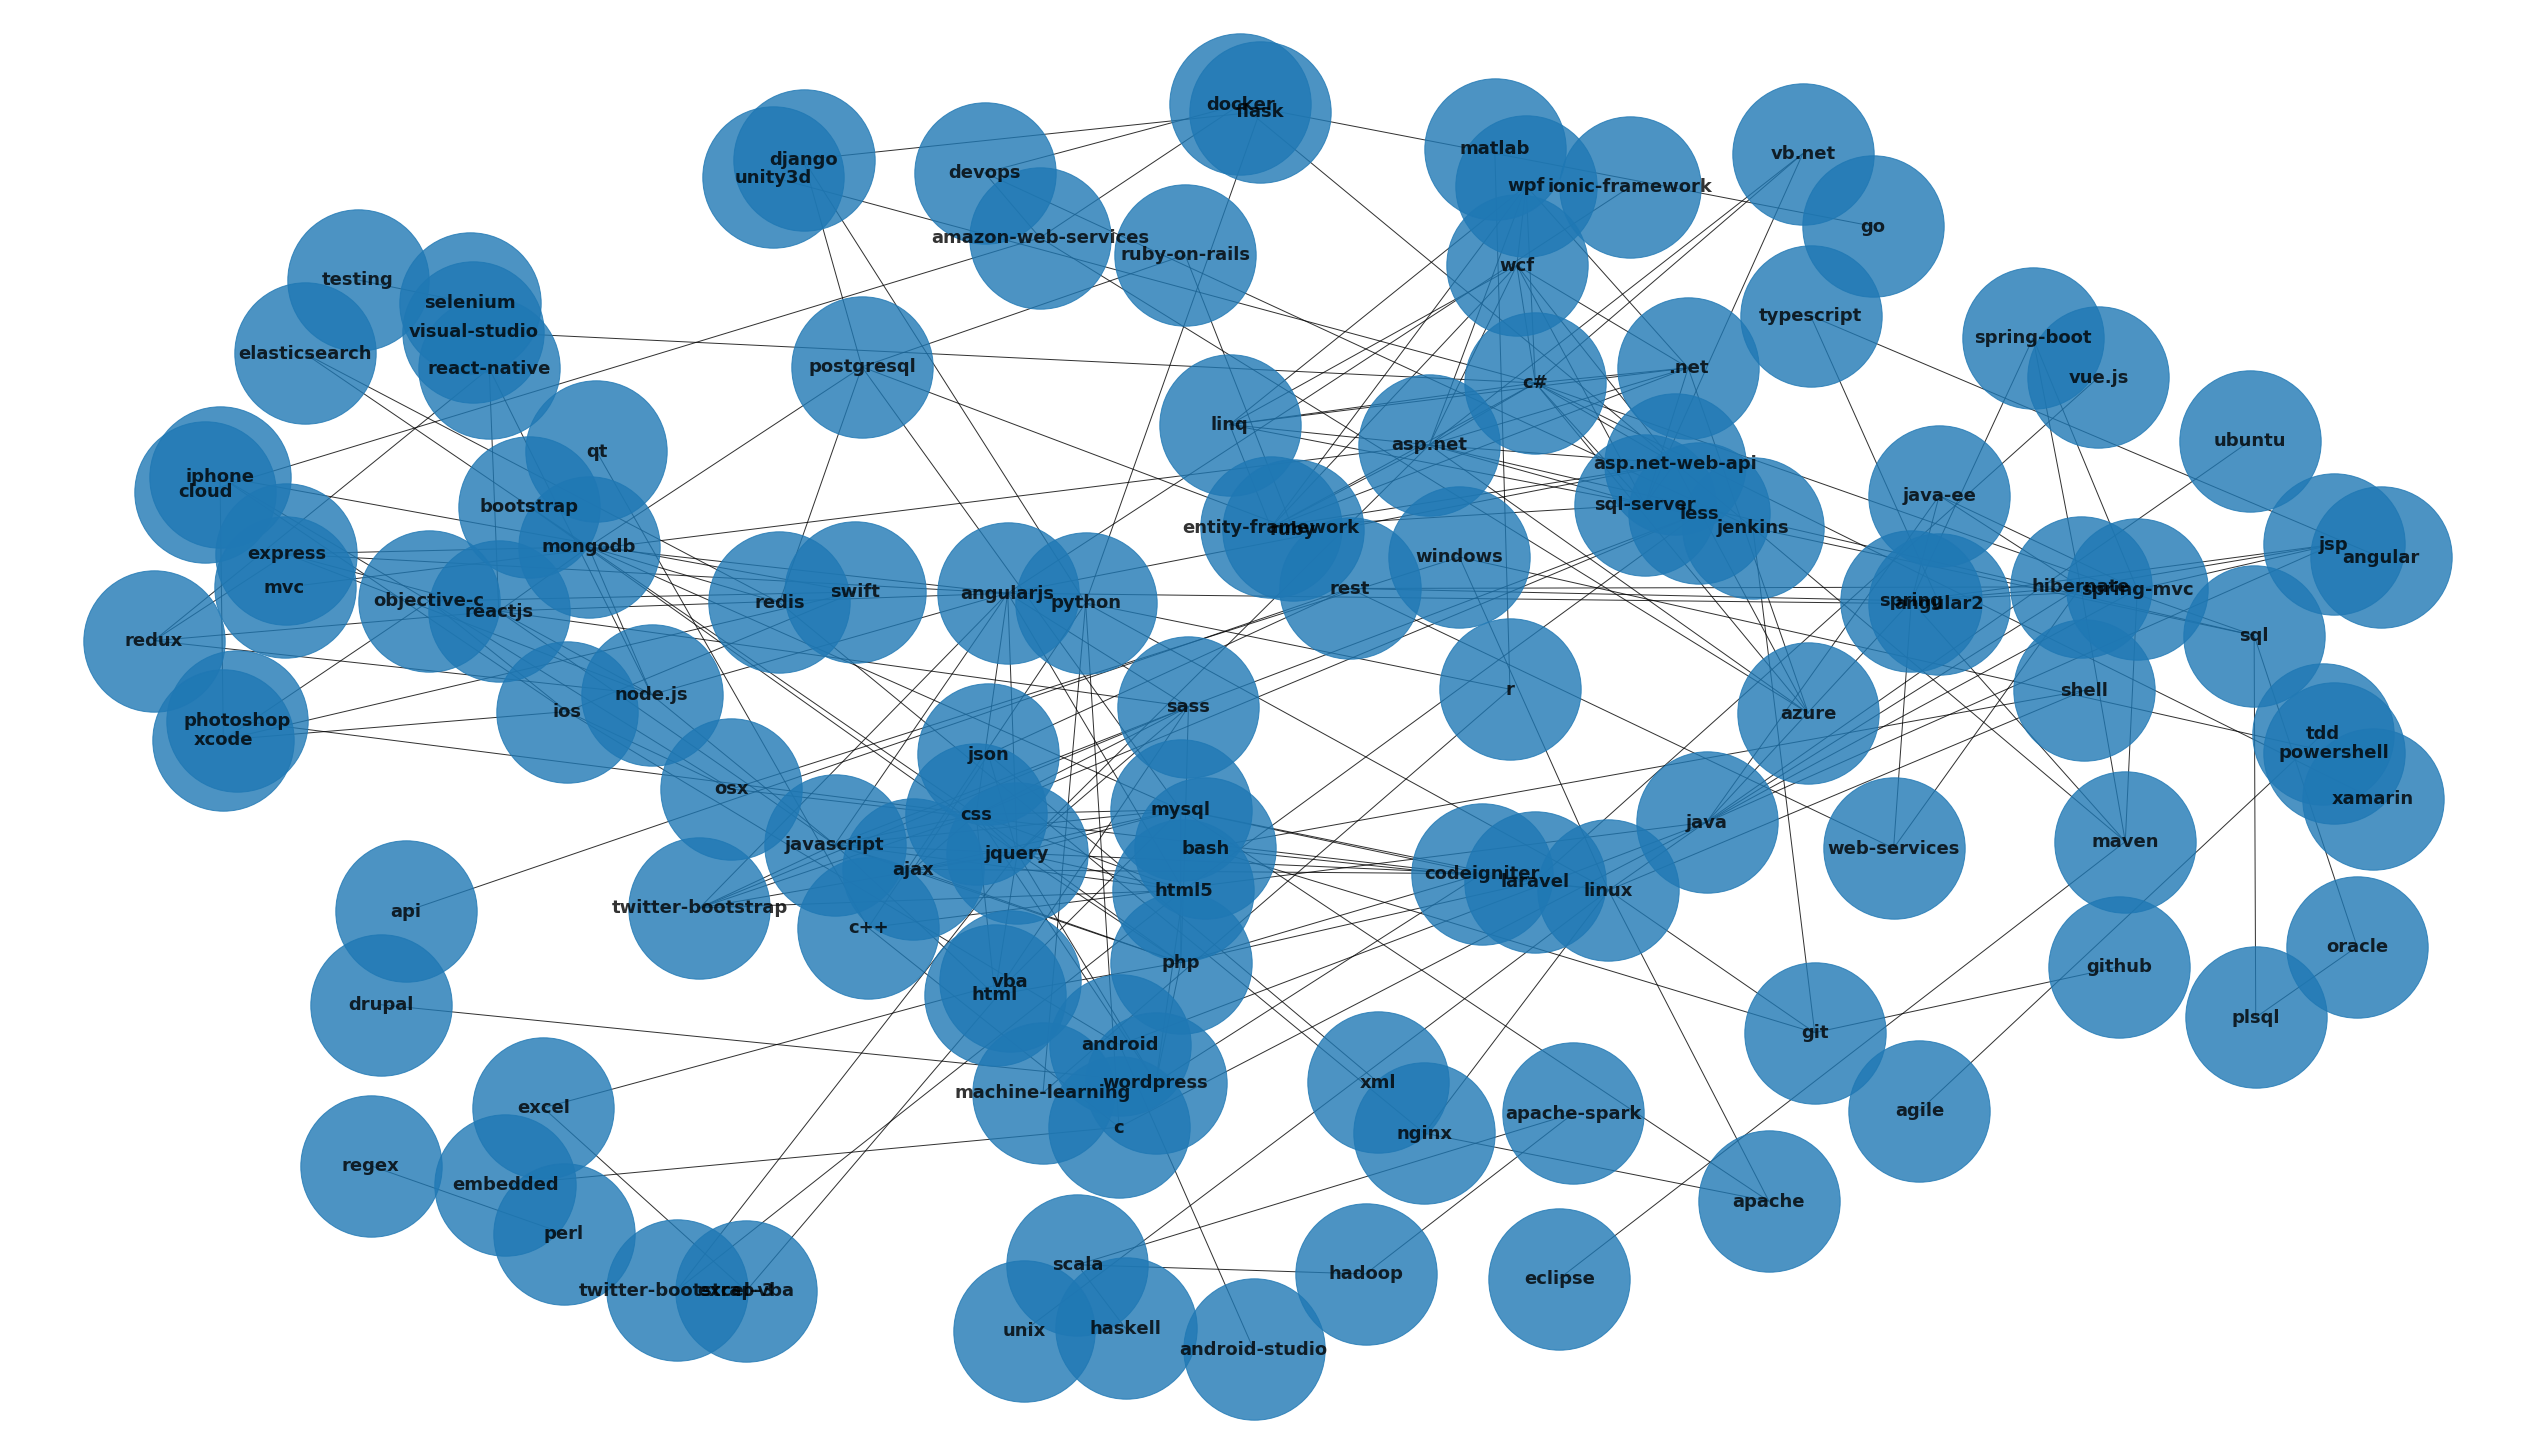

In [36]:
# Your code here
plt.figure(figsize=(35,20))
nx.draw(G, pos=nx.spring_layout(G, k=2, seed=10), with_labels=True,
        alpha=.8, node_size=20000, font_weight='bold', font_size=18)

## Perform an Initial Clustering using k-clique Clustering

Begin to explore the impact of using different values of k.

In [38]:
# Your code here
for i in range(2,6):
    kc_clusters = list(nx.algorithms.community.k_clique_communities(G, k=i))
    print(f"k = {i}, number of clusters = {len(kc_clusters)}")

k = 2, number of clusters = 6
k = 3, number of clusters = 16
k = 4, number of clusters = 5
k = 5, number of clusters = 5


## Visualize The Clusters Produced from the K-Clique Algorithm

> **Level-Up:** Experiment with different `nx.draw()` settings. See the [draw documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for a full list. Some recommended settings that you've previewed include the position parameter `pos`, `with_labels=True`, `node_color`, `alpha`, `node_size`, `font_weight` and `font_size`. Note that `nx.spring_layout(G)` is particularly useful for laying out a well formed network. With this, you can pass in parameters for the relative edge distance via `k` and set a `random_seed` to have reproducible results as in `nx.spring_layout(G, k=2.66, seed=10)`. For more details, see the [spring_layout documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.layout.spring_layout.html?highlight=spring%20layout#networkx.drawing.layout.spring_layout).

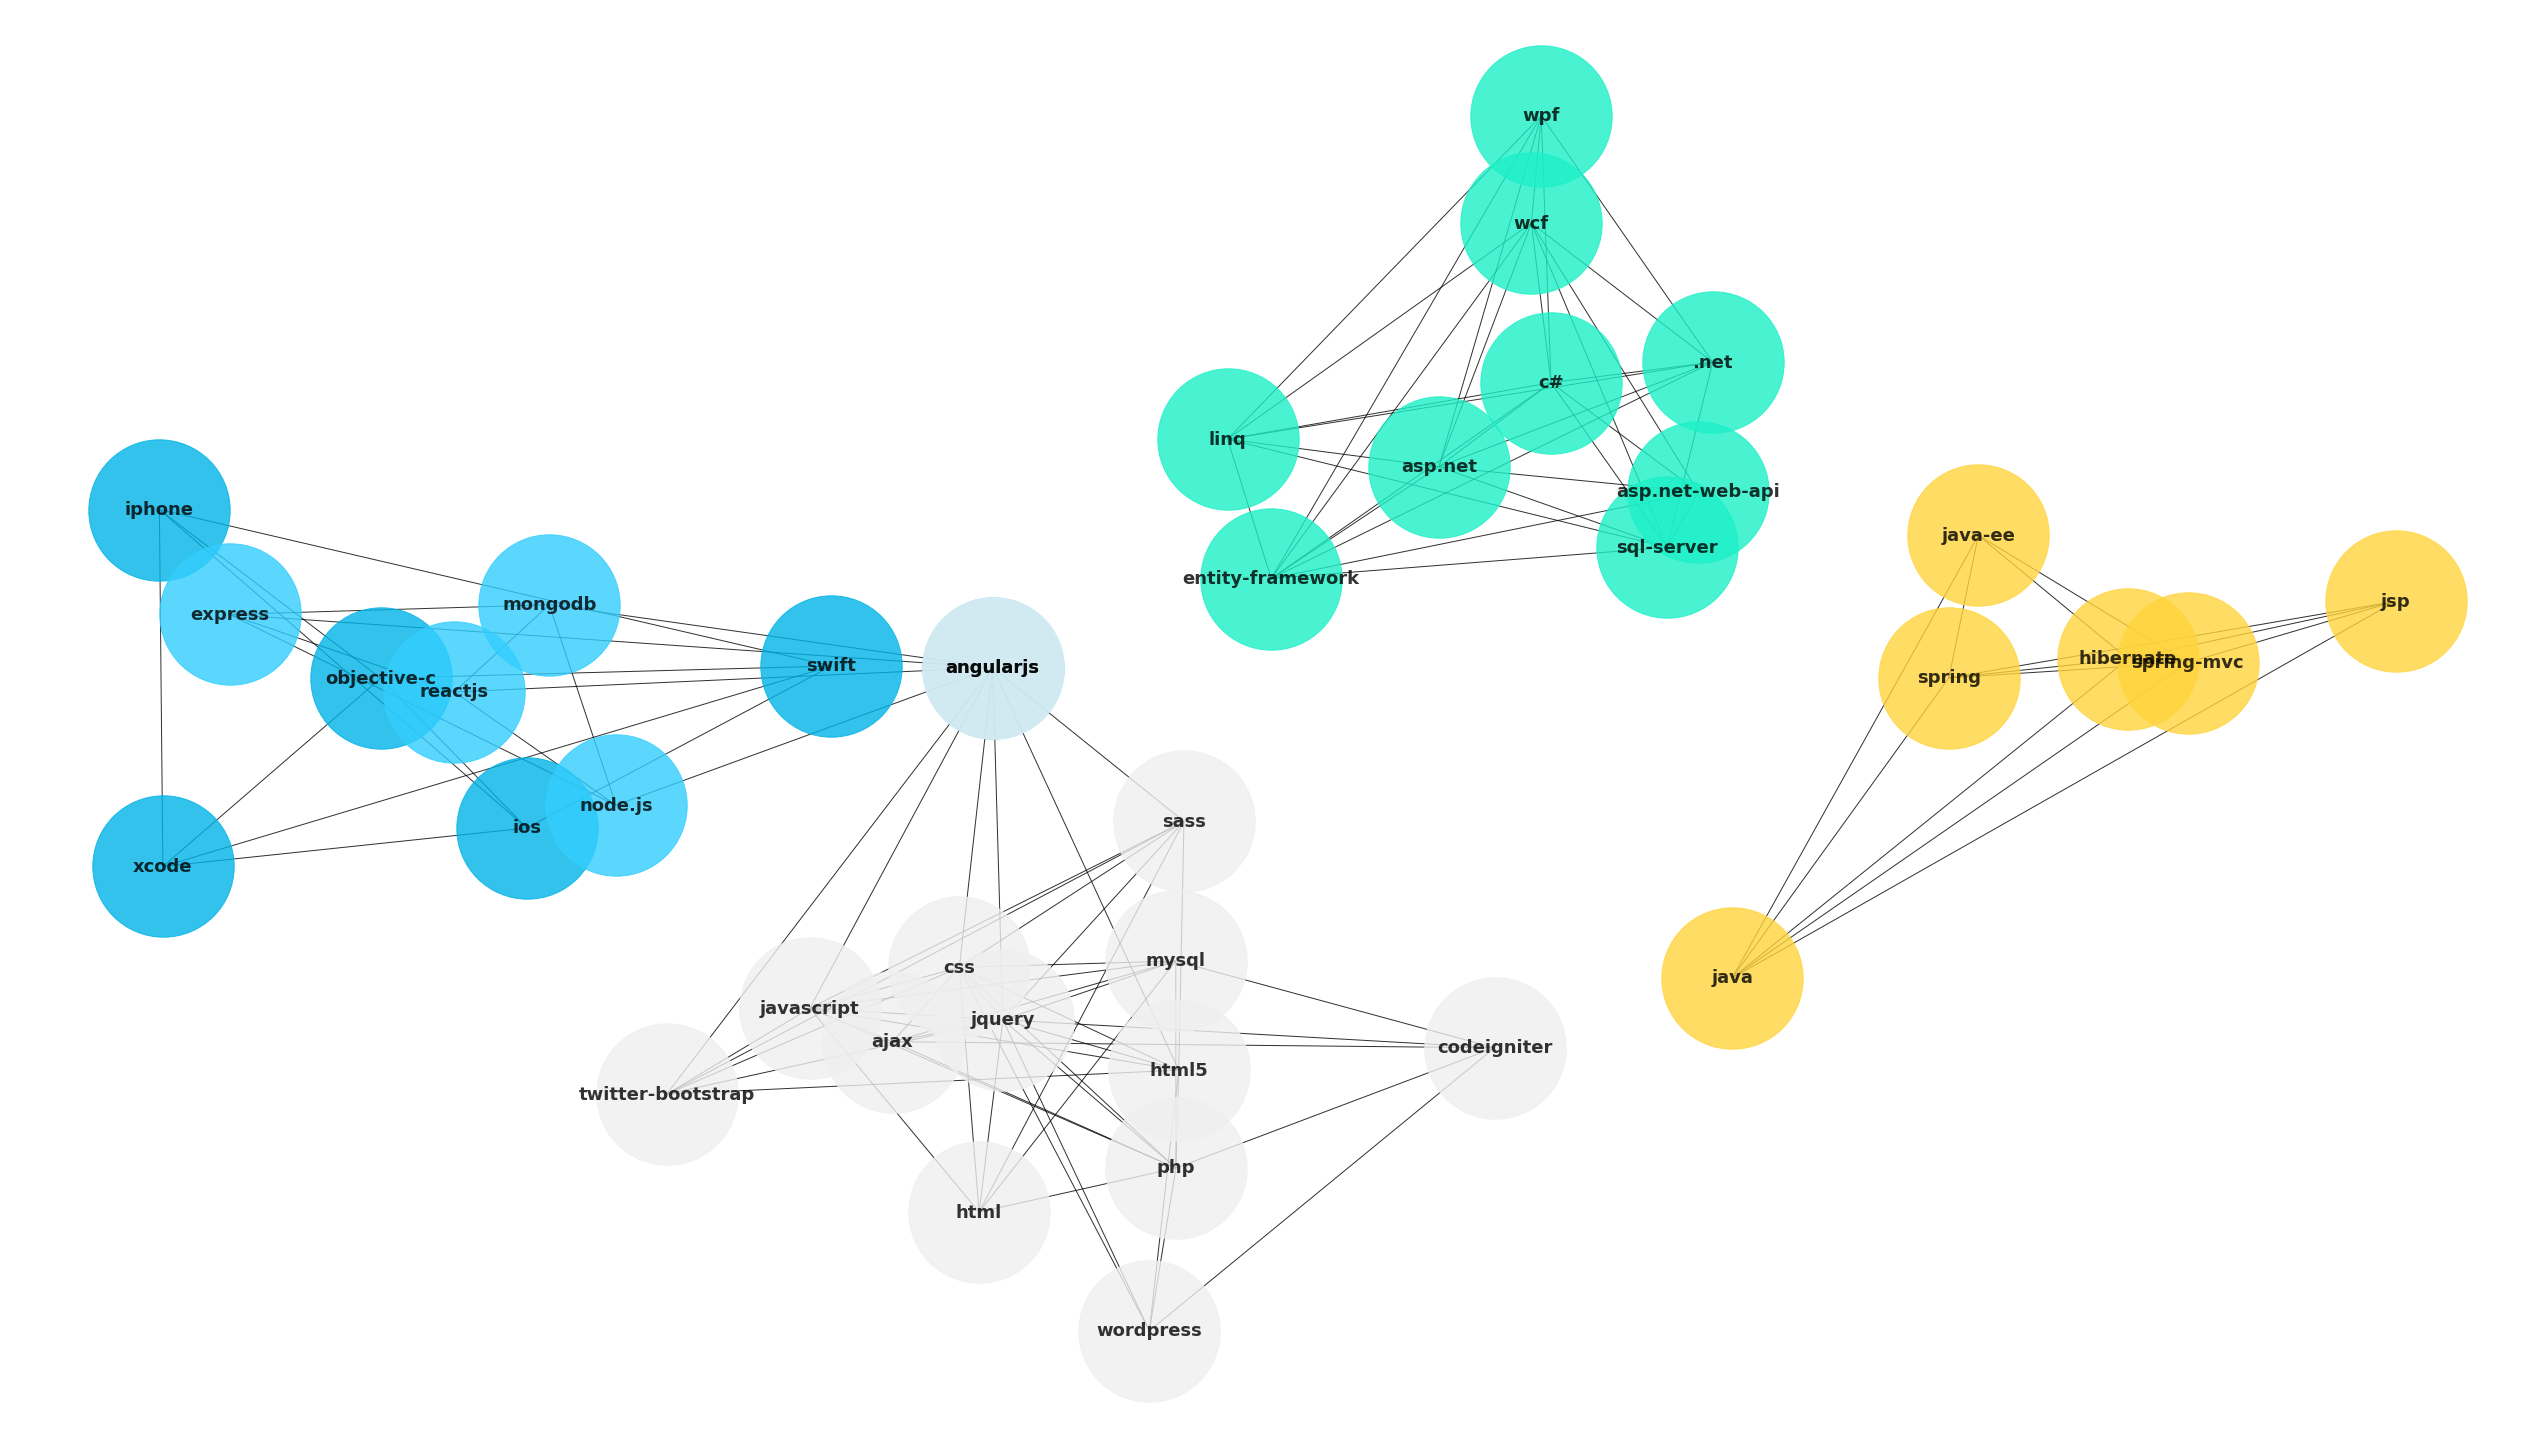

In [39]:
colors = [('teal', '#1cf0c7'),
         ('workzone_yellow', '#ffd43d'),
         ('light-blue', '#00b3e6'),
         ('medium-blue', '#32cefe'),
         ('gray', '#efefef'),
         ('dark-blue', '#1443ff')]
color_dict = dict(colors)

fig = plt.figure(figsize=(35,20))
for n, ci in enumerate(kc_clusters):
    ci = G.subgraph(ci)
    nx.draw(ci, pos=nx.spring_layout(G, k=2, seed=10), with_labels=True, node_color=colors[n%len(colors)][1],
            alpha=0.8, node_size=20000, font_weight='bold', font_size=18)

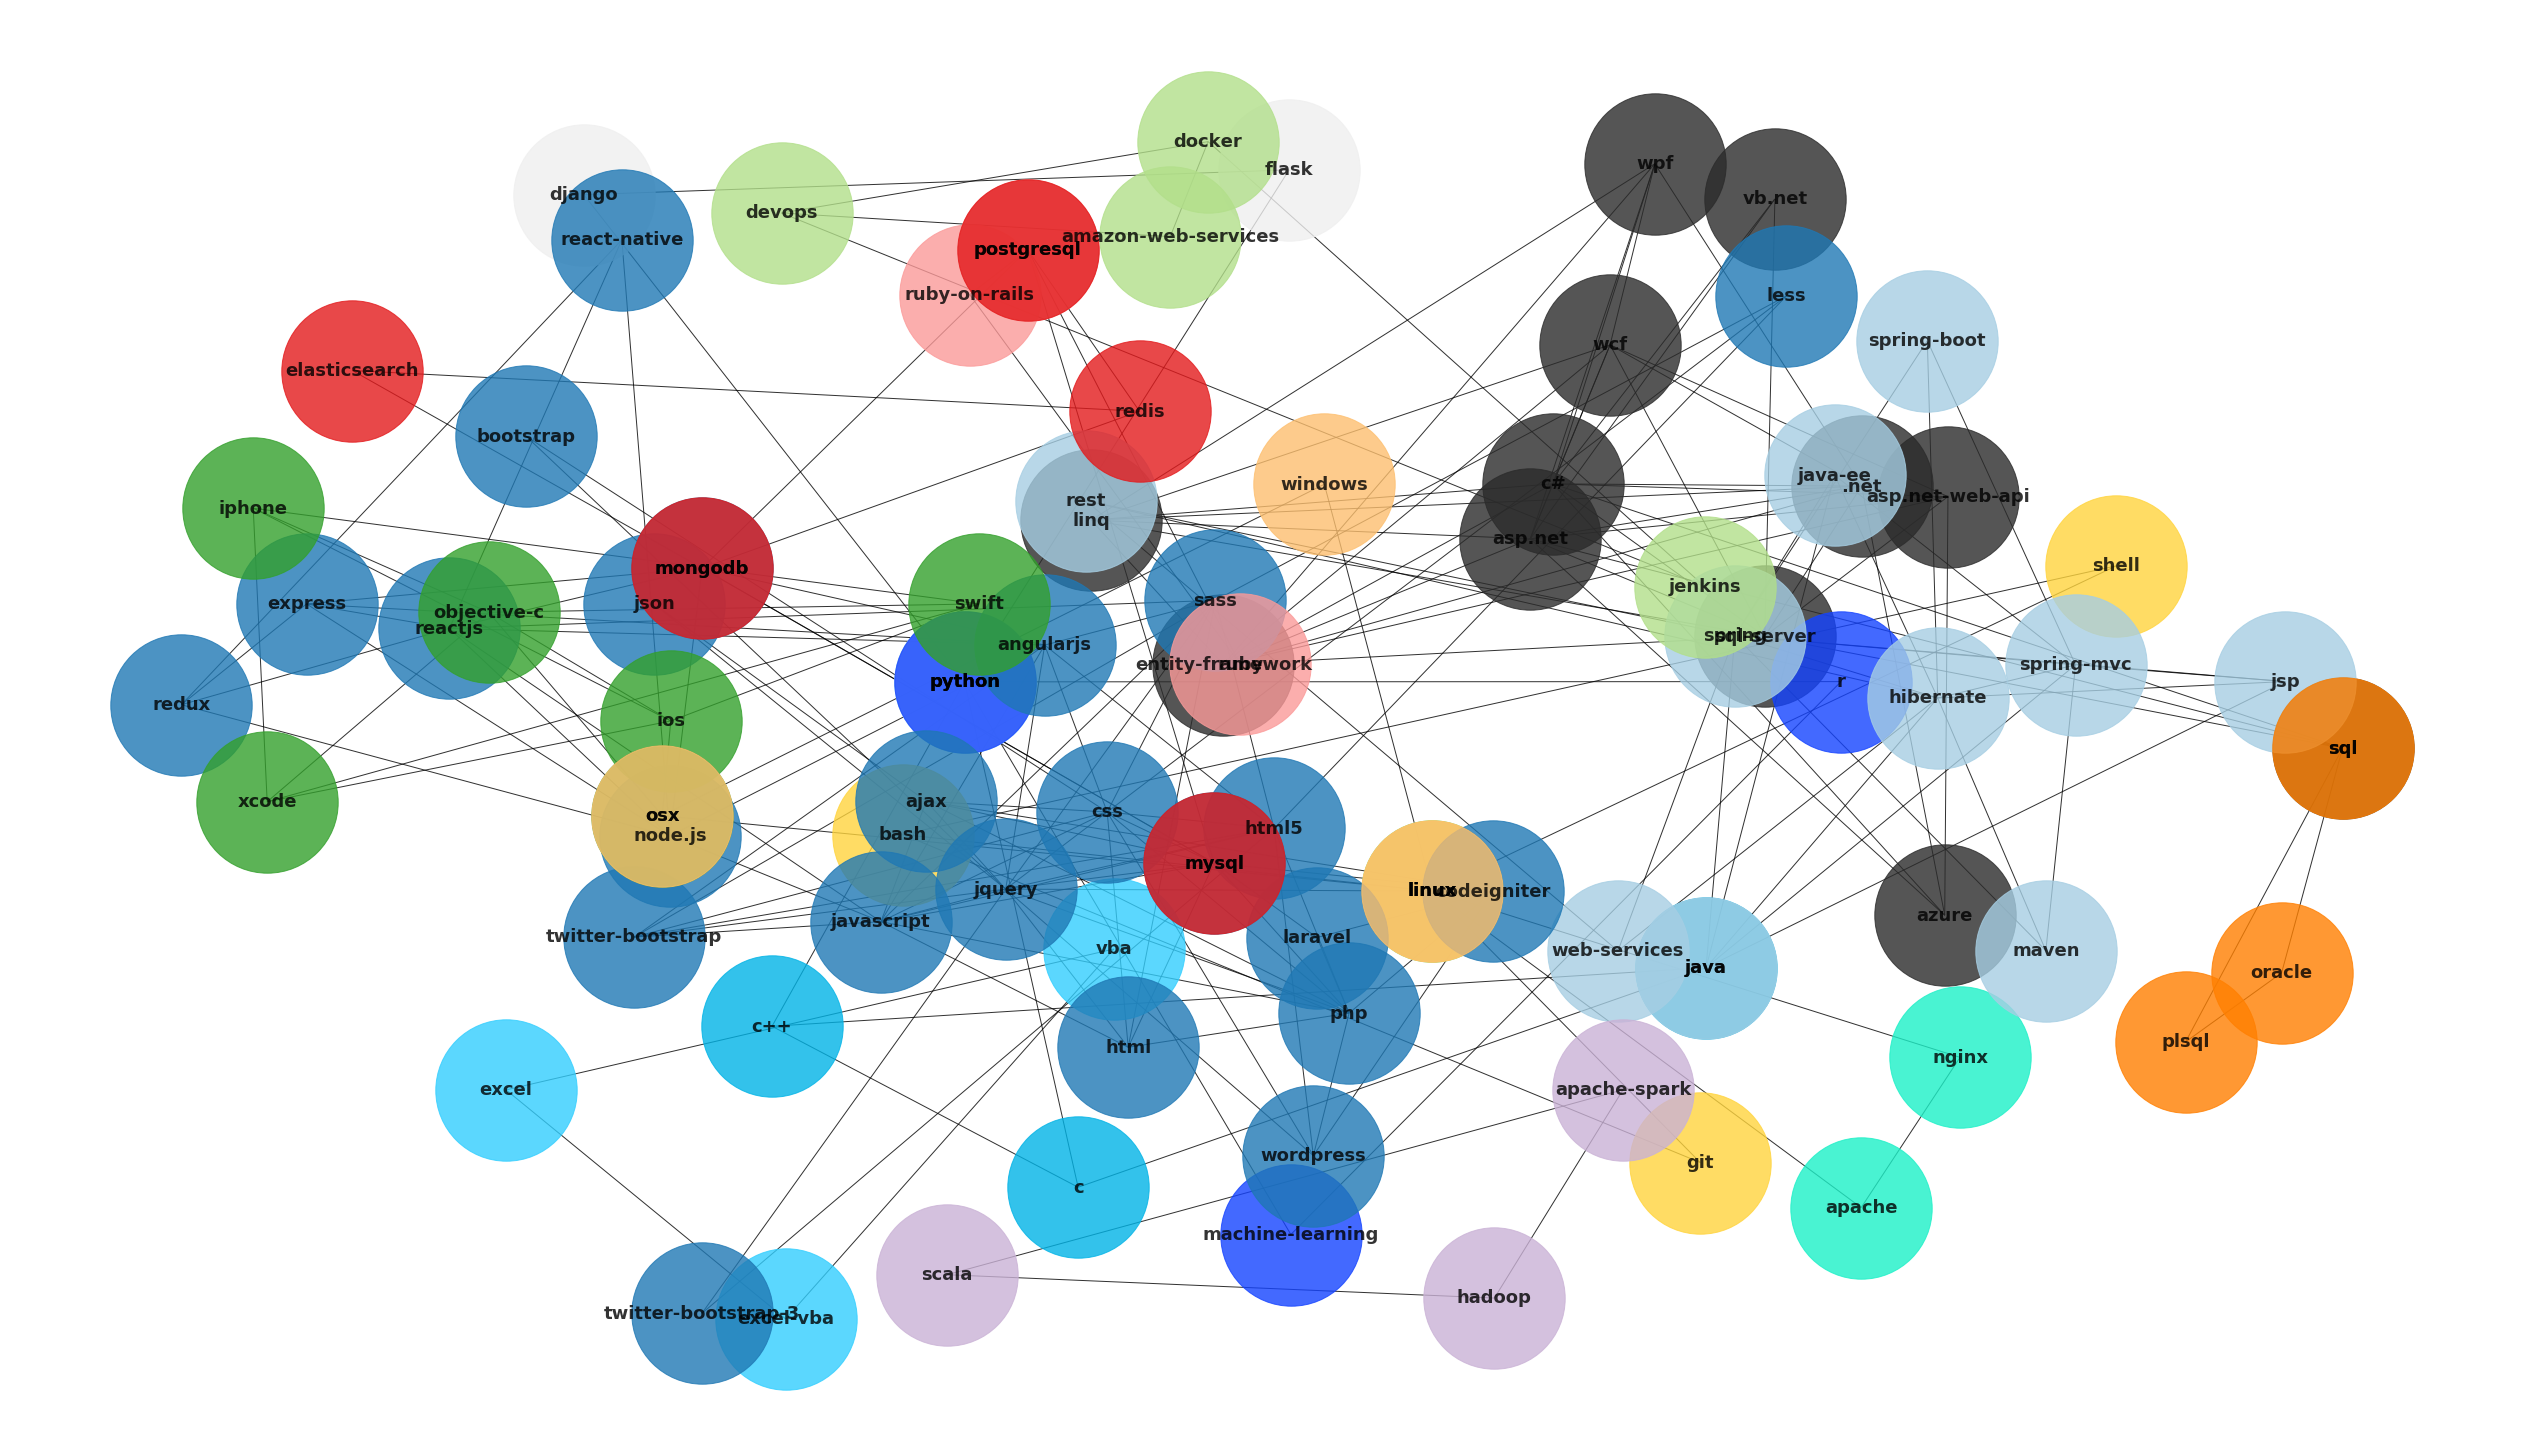

In [40]:
kc_clusters = list(nx.algorithms.community.k_clique_communities(G, k=3))
colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef','#2b2b2b', '#1443ff',
          '#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
          '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
fig = plt.figure(figsize=(35,20))
for n, ci in enumerate(kc_clusters):
    ci = G.subgraph(ci)
    nx.draw(ci, pos=nx.spring_layout(G, k=2.5, seed=10), with_labels=True, node_color=colors[n],
            alpha=0.8, node_size=20000, font_weight='bold', font_size=18)

## Perform an Alternative Clustering Using the Girvan-Newman Algorithm

Recluster the network using the Girvan-Newman algorithm. Remember that this will give you a list of cluster lists corresponding to the clusters that from removing the top $n$ edges according to some metric, typically edge betweenness.

In [41]:
c_gn = list(nx.algorithms.community.centrality.girvan_newman(G))
for n, clusters in enumerate(c_gn):
    print(f"After removing {n} clusters, there are {len(clusters)} clusters")

After removing 0 clusters, there are 7 clusters
After removing 1 clusters, there are 8 clusters
After removing 2 clusters, there are 9 clusters
After removing 3 clusters, there are 10 clusters
After removing 4 clusters, there are 11 clusters
After removing 5 clusters, there are 12 clusters
After removing 6 clusters, there are 13 clusters
After removing 7 clusters, there are 14 clusters
After removing 8 clusters, there are 15 clusters
After removing 9 clusters, there are 16 clusters
After removing 10 clusters, there are 17 clusters
After removing 11 clusters, there are 18 clusters
After removing 12 clusters, there are 19 clusters
After removing 13 clusters, there are 20 clusters
After removing 14 clusters, there are 21 clusters
After removing 15 clusters, there are 22 clusters
After removing 16 clusters, there are 23 clusters
After removing 17 clusters, there are 24 clusters
After removing 18 clusters, there are 25 clusters
After removing 19 clusters, there are 26 clusters
After removin

## Create a Visualization Wrapper

Now that you have an idea of how splintered the network becomes based on the number of edges removed, you'll want to examine some of the subsequent groups that gradually break apart. Since the network is quiet complex to start with, using subplots is not a great option; each subplot would be too small to accurately read. Create a visualization function `plot_girvan_newman(G, clusters)` which takes a NetworkX graph object as well as one of the clusters from the output of the Girvan-Newman algorithm above and plots the network with a unique color for each cluster.

> **Level-Up:** Experiment with different `nx.draw()` settings. See the [draw documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for a full list. Some recommended settings that you've previewed include the position parameter `pos`, `with_labels=True`, `node_color`, `alpha`, `node_size`, `font_weight` and `font_size`. Note that `nx.spring_layout(G)` is particularly useful for laying out a well formed network. With this, you can pass in parameters for the relative edge distance via `k` and set a `random_seed` to have reproducible results as in `nx.spring_layout(G, k=2.66, seed=10)`. For more details, see the [spring_layout documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.layout.spring_layout.html?highlight=spring%20layout#networkx.drawing.layout.spring_layout).

In [51]:
def plot_girvan_newman(G, clusters):
    # Your code here 
    fig = plt.figure(figsize=(35,20))
    colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef',
          '#1443ff','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
          '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99',
          '#b15928','#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3',
          '#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5',
          '#ffed6f','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5',
          '#80cdc1', '#35978f', '#01665e', '#003c30']
    for n, c in enumerate(clusters):
        ci = G.subgraph(c)
        nx.draw(ci, pos=nx.spring_layout(G, k=2.66, seed=10), with_labels=True, node_color=colors[n],
                alpha=0.8, node_size=20000, font_weight='bold', font_size=20)
    plt.show()

## Visualize the Various Clusters that Form Throughout the Girvan-Newman Algorithm

Use your function to visualize the various clusters that form throughout the Girvan-Newman algorithm as you remove more and more edges from the network.

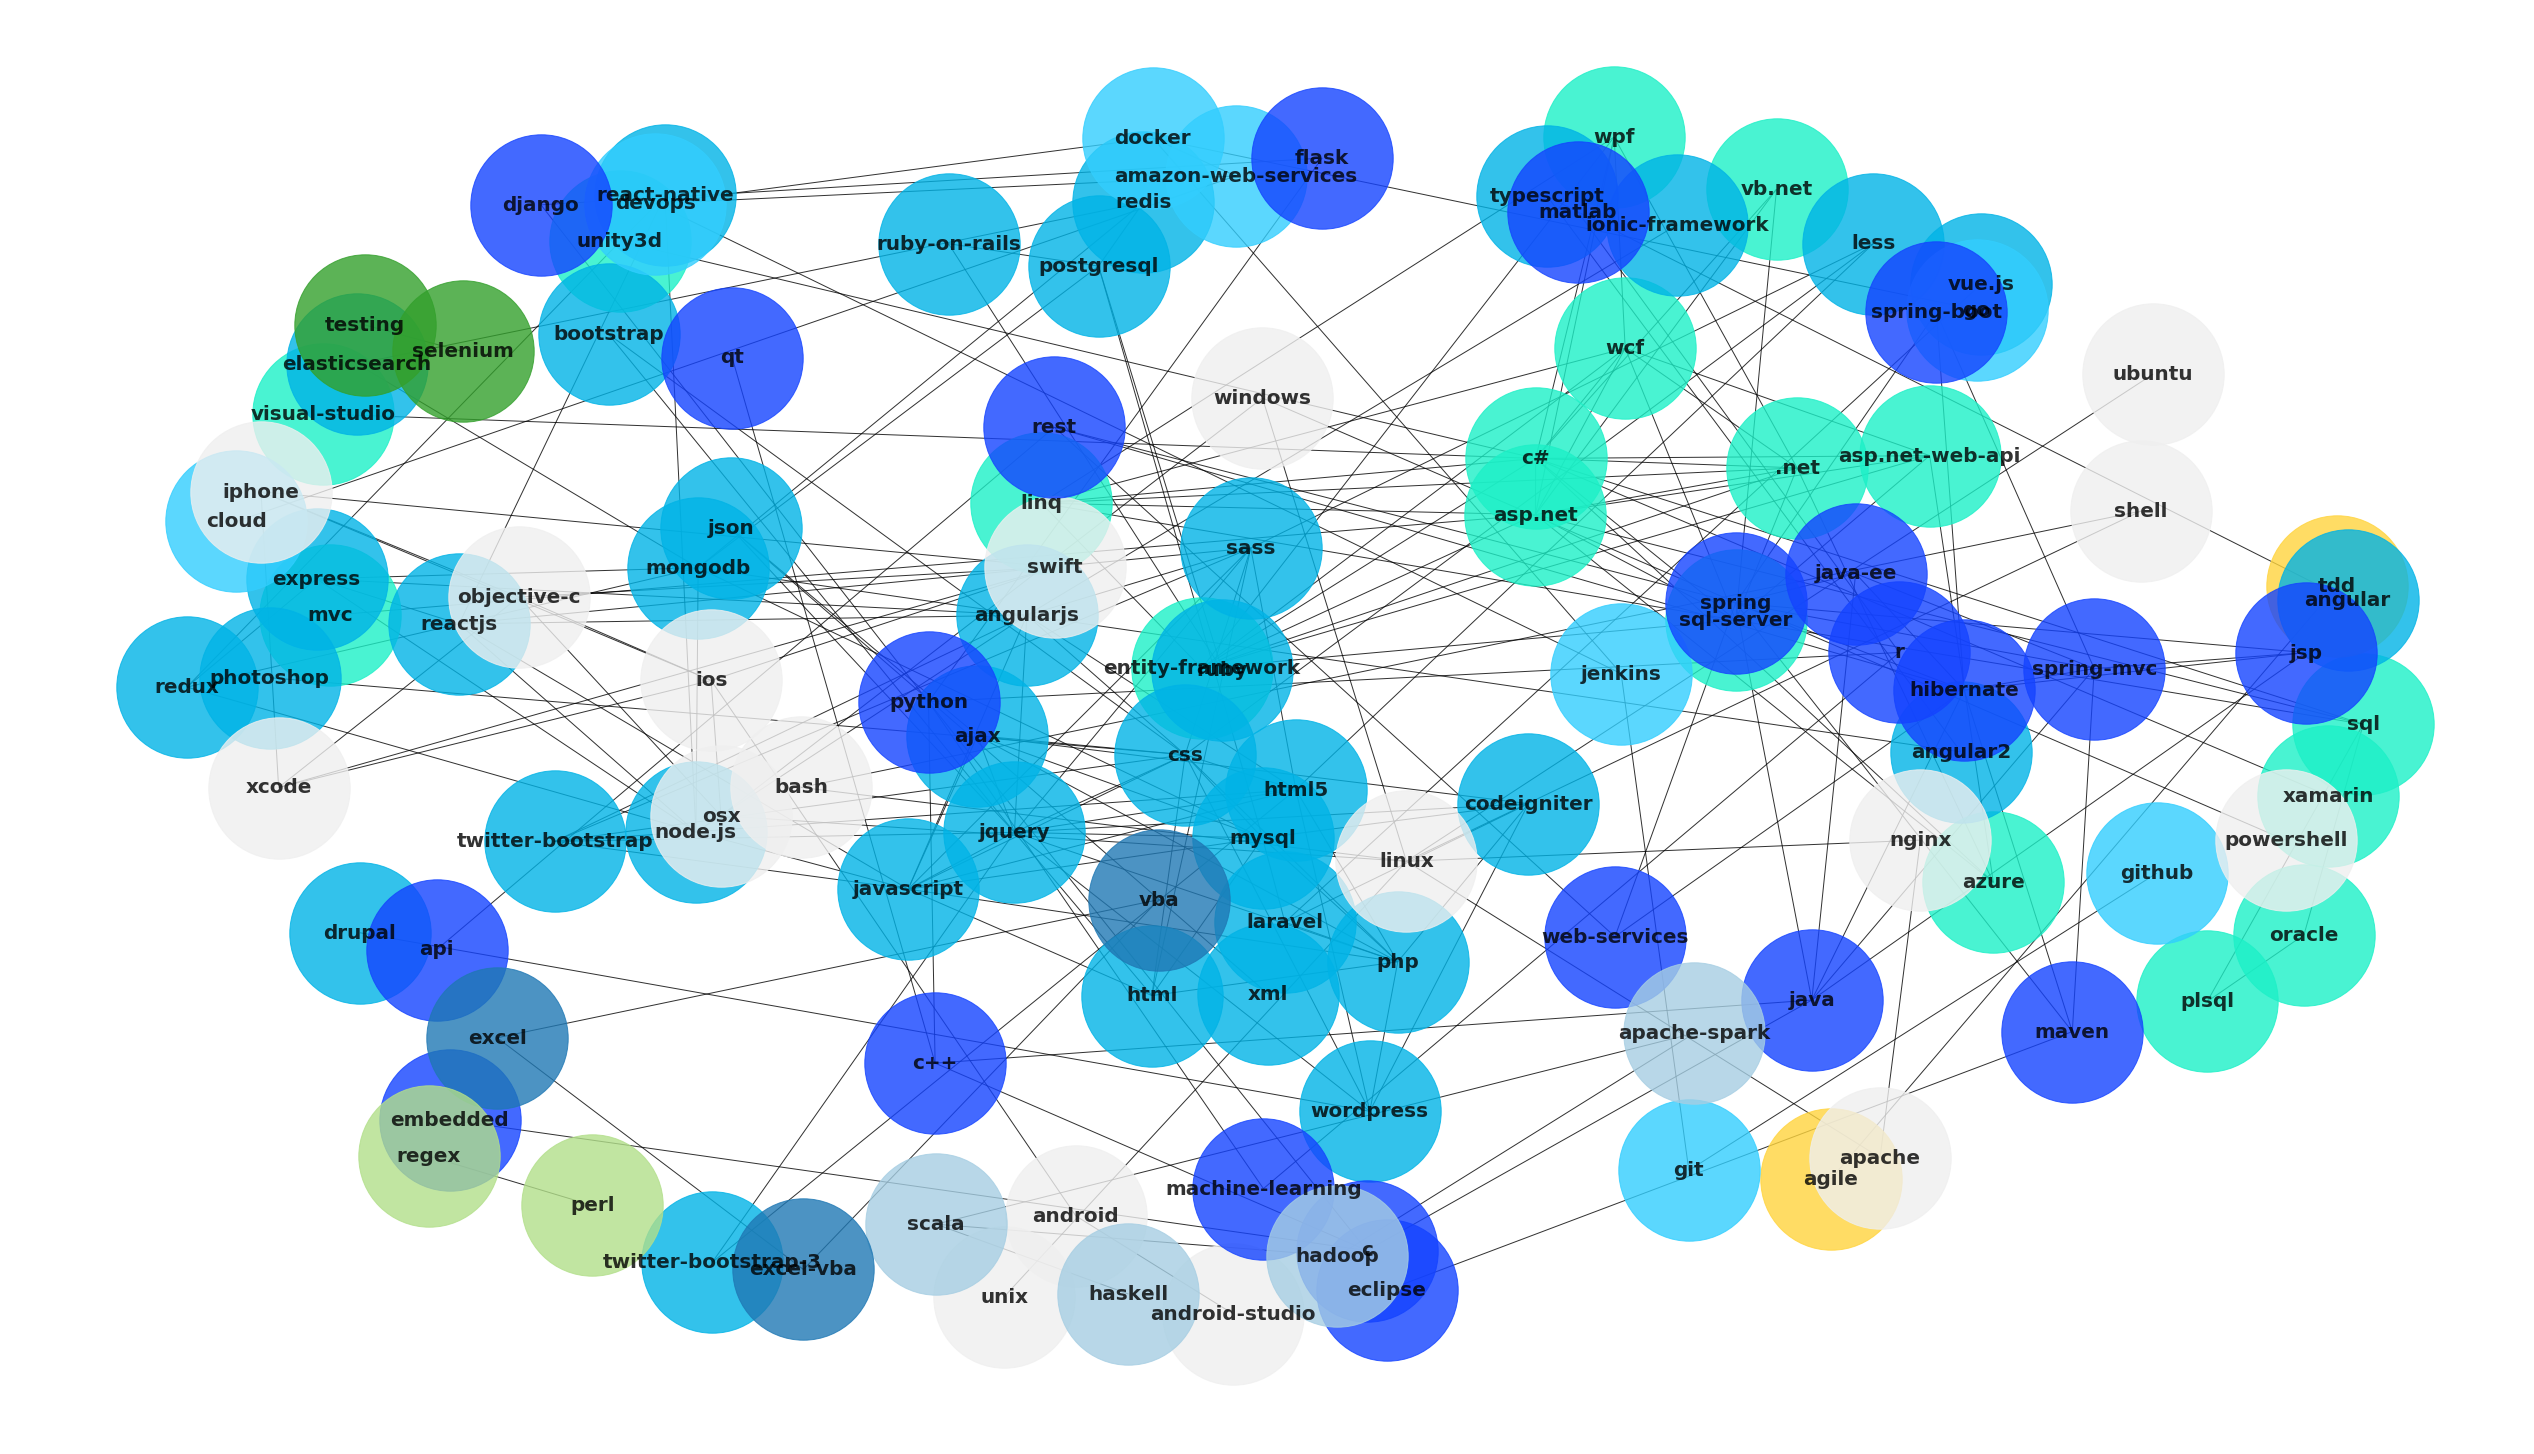

In [52]:
# Your code here
plot_girvan_newman(G, c_gn[3])

## Cluster Decay Rate

Create a visual to help yourself understand the rate at which clusters of this network formed versus the number of edges removed.

> **Level-Up**: Based on your graphic, what would you predict is an appropriate number of clusters? 

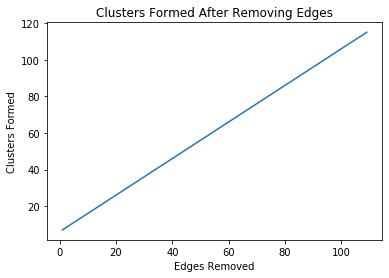

In [55]:
# Your code here
y = [len(cluster) for cluster in c_gn]
x = range(1, len(c_gn) + 1)
plt.plot(x, y)
plt.xlabel("Edges Removed")
plt.ylabel("Clusters Formed")
plt.title("Clusters Formed After Removing Edges")
plt.show()

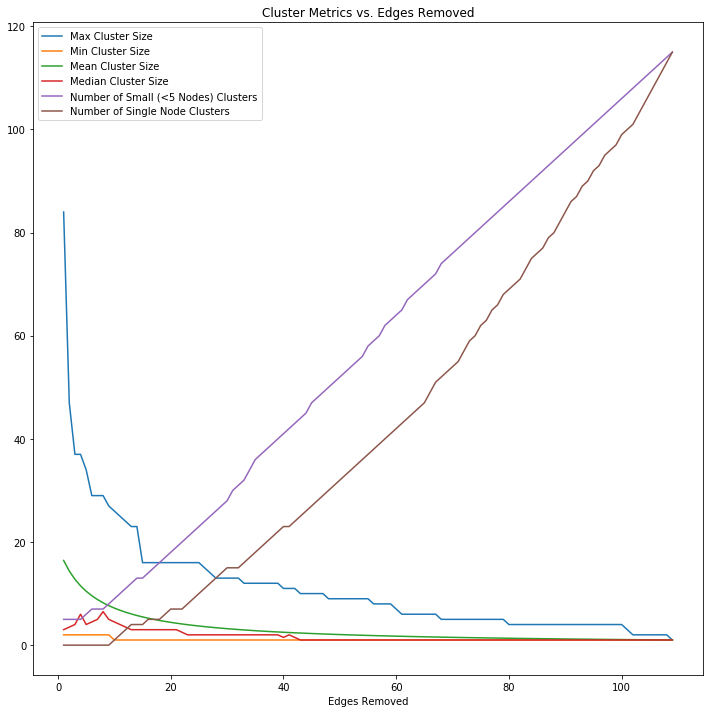

In [56]:
import numpy as np

plt.figure(figsize=(12,12))

max_cluster_size = [max([len(c) for c in cluster]) for cluster in c_gn]
plt.plot(x, max_cluster_size, label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in c_gn]
plt.plot(x, min_cluster_size, label='Min Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in c_gn]
plt.plot(x, mean_cluster_size, label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in c_gn]
plt.plot(x, median_cluster_size, label='Median Cluster Size')

small_clusters = [sum([1 if len(c) <= 5 else 0 for c in cluster]) for cluster in c_gn]
plt.plot(x, small_clusters, label='Number of Small (<5 Nodes) Clusters')

single_node_clusters = [sum([1 if len(c) == 1 else 0 for c in cluster]) for cluster in c_gn]
plt.plot(x, single_node_clusters, label='Number of Single Node Clusters')

plt.legend()
plt.title("Cluster Metrics vs. Edges Removed")
plt.xlabel("Edges Removed")
plt.show()

## Choose a Clustering 

Now that you have generated various clusters within the overall network, which do you think is the most appropriate or informative?

Number of clusters: 27


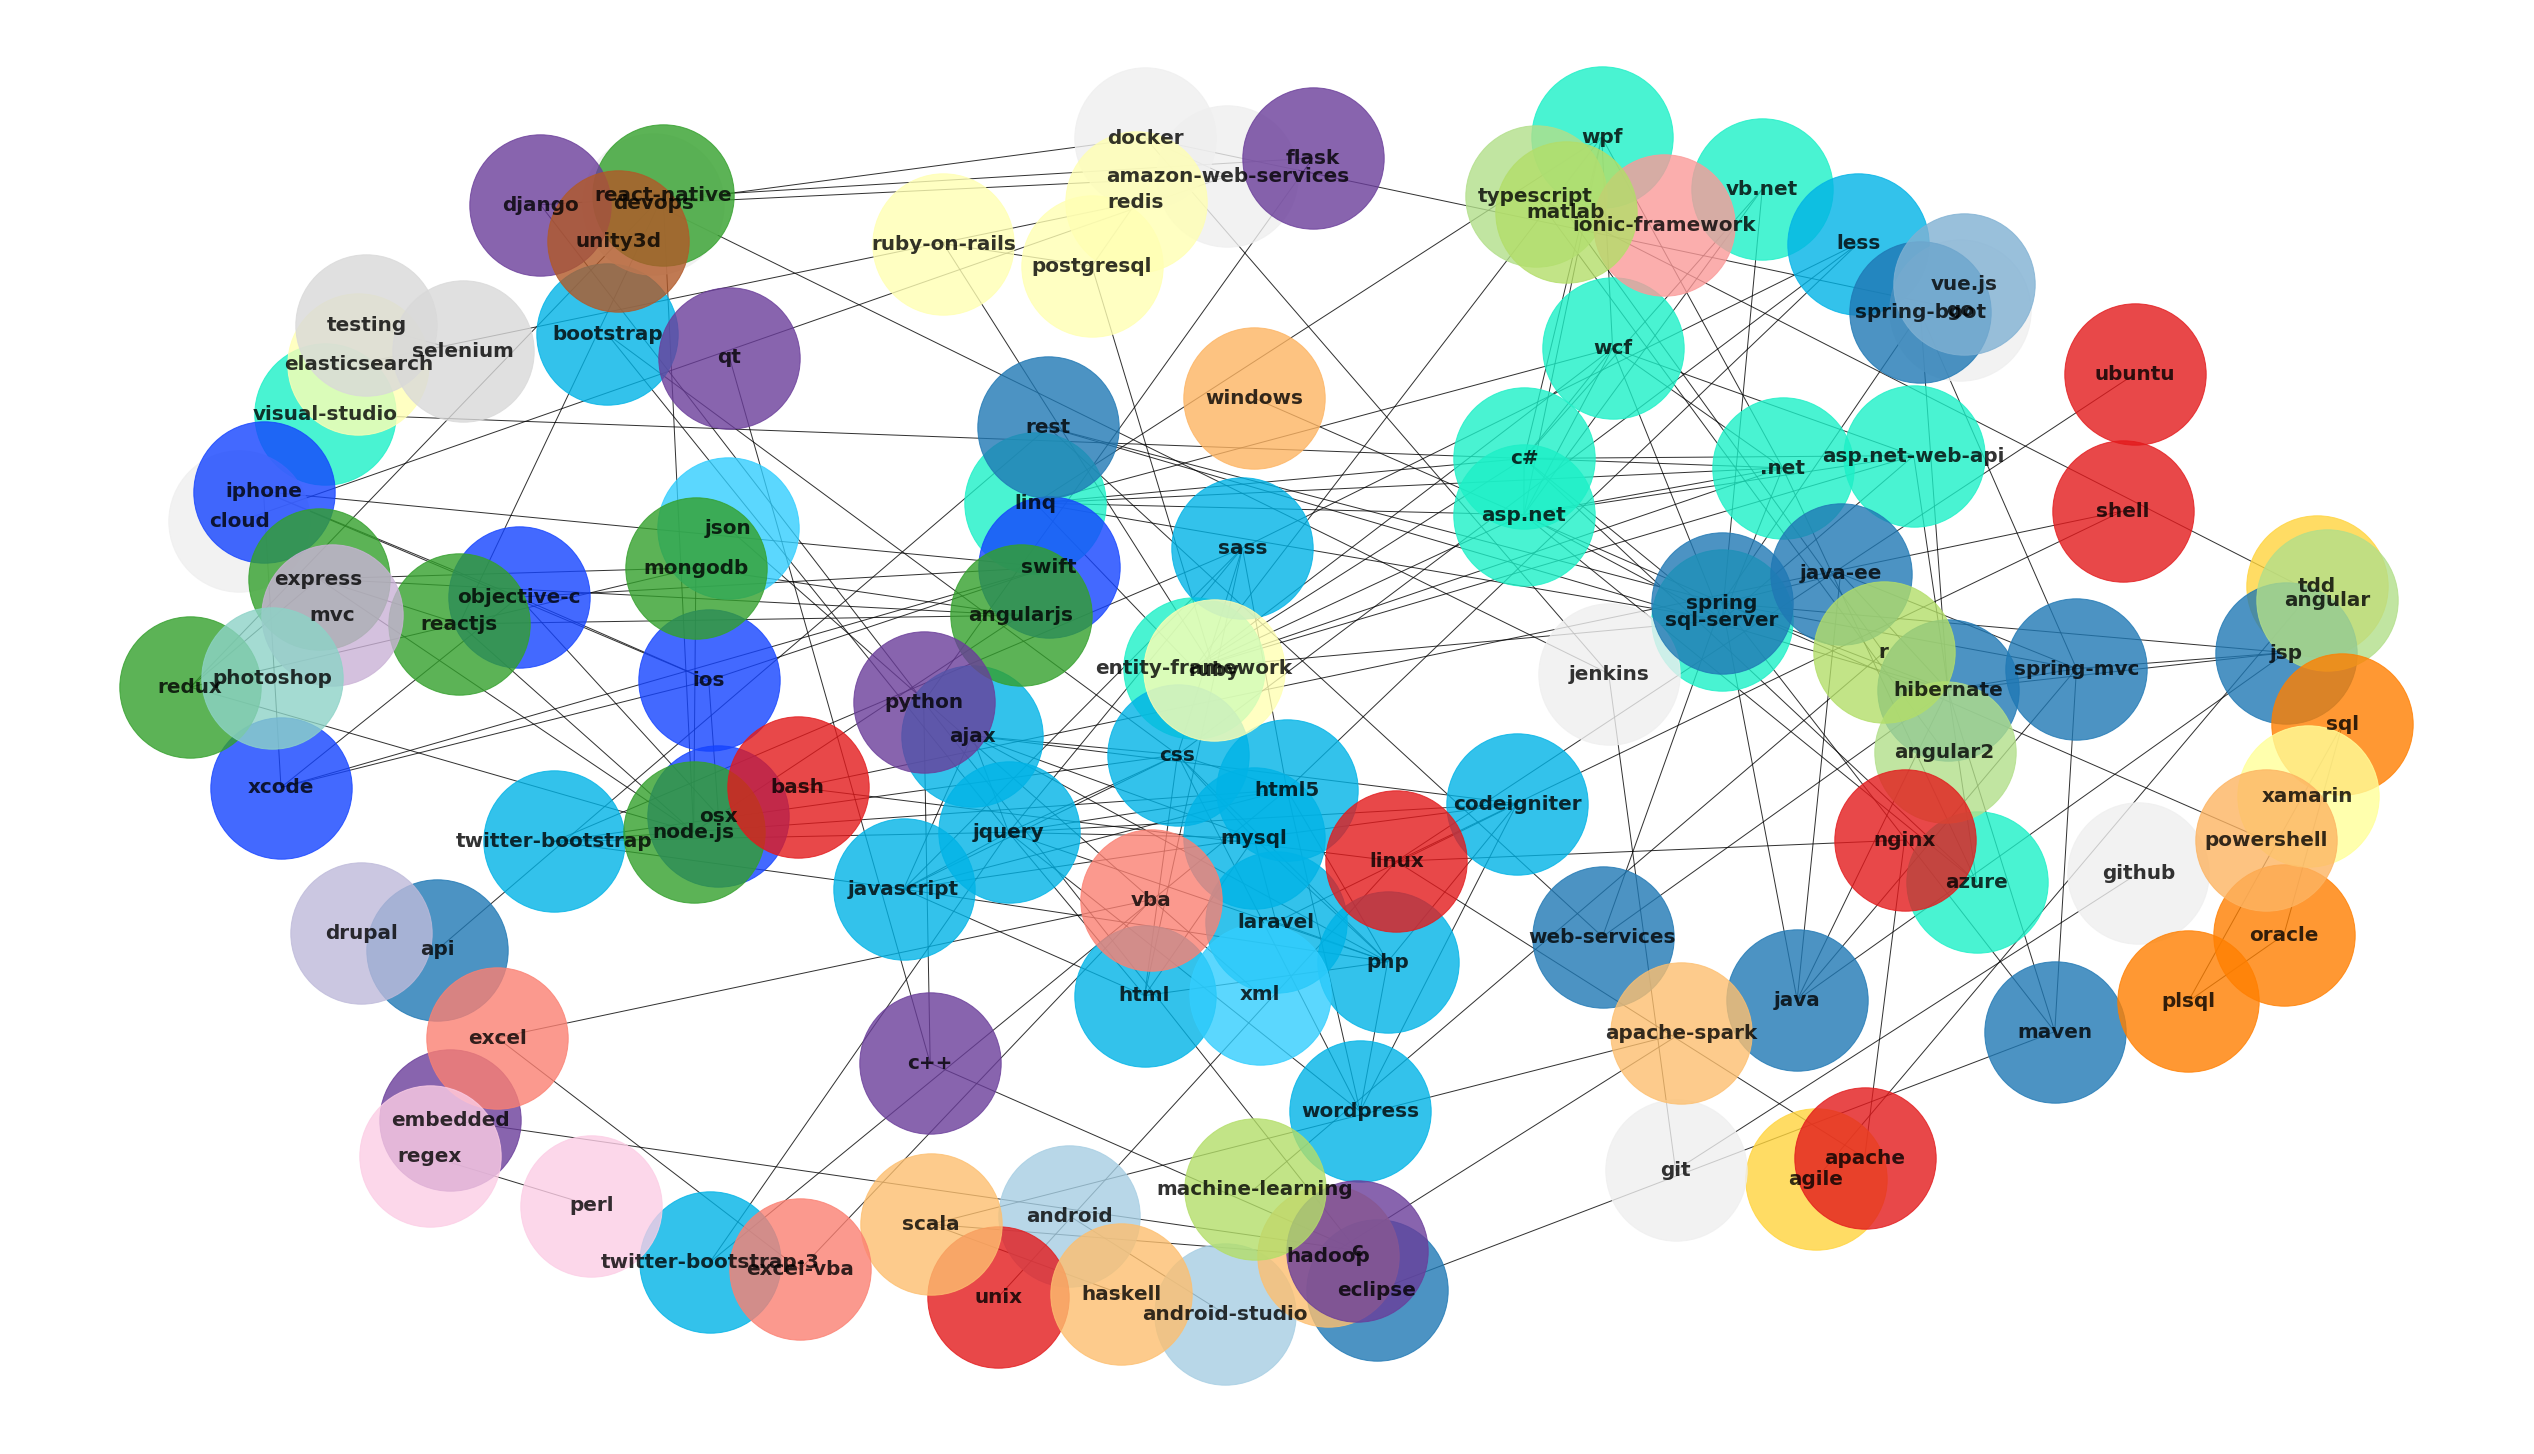

In [58]:
# Your code/response here
# 20 edges removed seems to be where all the metrics converge
# and particularly where the max cluster size decreases much less drastically

print(f"Number of clusters: {len(c_gn[20])}")
plot_girvan_newman(G, c_gn[20])

## Summary

In this lab you practice using the k-clique and Girvan-Newman methods for clustering. Additionally, you may have also gotten a better sense of some of the current technological landscape. As you can start to see, network clustering provides you with powerful tools to further subset large networks into smaller constituencies allowing you to dig deeper into their particular characteristics.